# Step 1: Imports and Reading Data

In [55]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# === Load Data ===
games_df = pd.read_csv("../DATA/games.csv")
turns_df = pd.read_csv("../DATA/turns.csv")
train_df = pd.read_csv("../DATA/train.csv")

# === Quick Overview ===
print("games_df:")
display(games_df.head())
print(games_df.info())

print("\n\nturns_df:")
display(turns_df.head())
print(turns_df.info())

print("\n\ntrain_df:")
display(train_df.head())
print(train_df.info())

games_df:


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB
None


turns_df:


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB
None


train_df:


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100820 entries, 0 to 100819
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   game_id   100820 non-null  int64 
 1   nickname  100820 non-null  object
 2   score     100820 non-null  int64 
 3   rating    100820 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB
None


# Step 2: Data Understanding
- A basic statistics summary for all numerical columns for each DataFrame
- Missing Data Check
- Column Types Check

In [57]:
# === A basic statistics summary for all numerical columns for each DataFrame ===
print("A basic statistics summary of games_df:\n")
print(games_df.describe())

print("\n\nA basic statistics summary of turns_df:\n")
print(turns_df.describe())

print("\n\nA basic statistics summary of train_df:\n")
print(train_df.describe())


# === Missing Data Check ===
print("\n\nMissing values in games_df:\n")
print(games_df.isnull().sum())

print("\n\nMissing values in turns_df:\n")
print(turns_df.isnull().sum())

print("\n\nMissing values in train_df:\n")
print(train_df.isnull().sum())


# === Column Types ===
print("\n\ngames_df dtypes:\n")
print(games_df.dtypes)

print("\n\nturns_df dtypes:\n")
print(turns_df.dtypes)

print("\n\ntrain_df dtypes:\n")
print(train_df.dtypes)

A basic statistics summary of games_df:

            game_id        winner  initial_time_seconds  increment_seconds  \
count  72773.000000  72773.000000          72773.000000        72773.00000   
mean   36387.000000      0.350734           1198.034230            0.22856   
std    21007.899907      0.484859            713.185219            2.54802   
min        1.000000     -1.000000             15.000000            0.00000   
25%    18194.000000      0.000000            900.000000            0.00000   
50%    36387.000000      0.000000           1200.000000            0.00000   
75%    54580.000000      1.000000           1200.000000            0.00000   
max    72773.000000      1.000000           3600.000000           60.00000   

       max_overtime_minutes  game_duration_seconds  
count          72773.000000           72773.000000  
mean               2.143707             484.069347  
std                2.989853             333.563128  
min                0.000000               7.

# Step 3: Feature Understanding (Univariate Analysis)

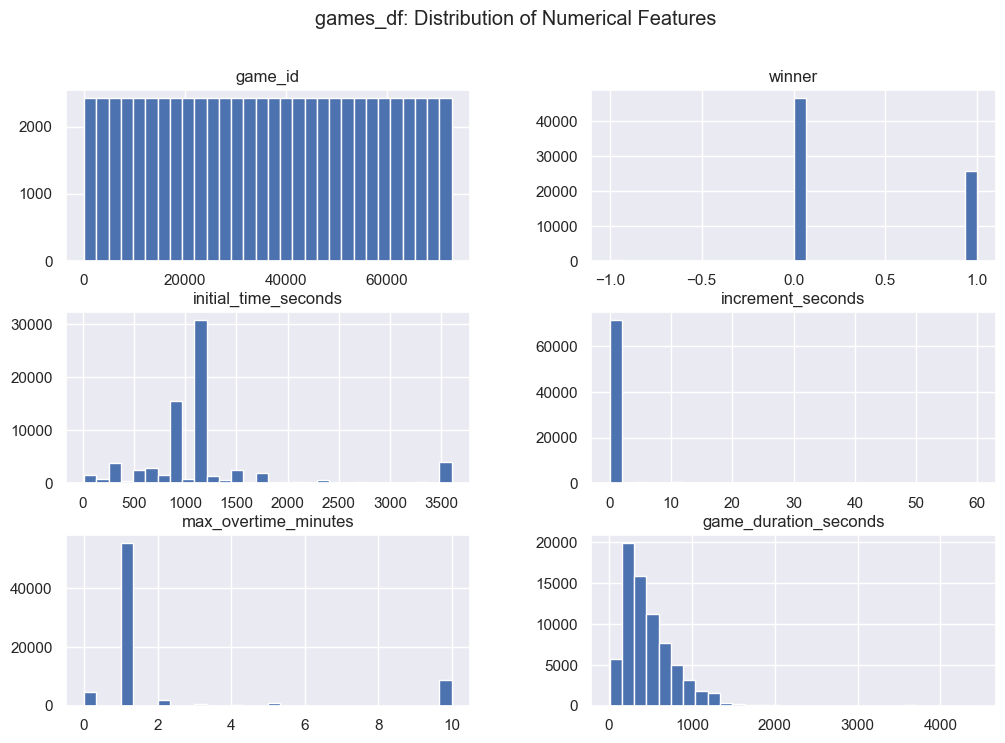


Value counts for first:
 first
STEEBot         12210
BetterBot       12014
HastyBot        11632
BB-8             3288
hannahbanana     1008
pandorable        880
marvin            647
Goldenlamb        547
Eloquent          518
hulkbuster        333
Name: count, dtype: int64

Value counts for time_control_name:
 time_control_name
regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: count, dtype: int64

Value counts for game_end_reason:
 game_end_reason
STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: count, dtype: int64

Value counts for created_at:
 created_at
2022-09-20 15:59:19    3
2022-09-09 14:37:13    3
2022-09-03 14:40:13    2
2022-08-14 00:00:57    2
2022-08-29 03:19:05    2
2022-09-18 02:06:43    2
2022-09-06 08:52:49    2
2022-09-08 09:28:02    2
2022-09-21 18:06:26    2
2022-09-14 19:53:42    2
Name: count, dtype: int64

Value counts for lexicon:
 lexicon
CSW21     44594


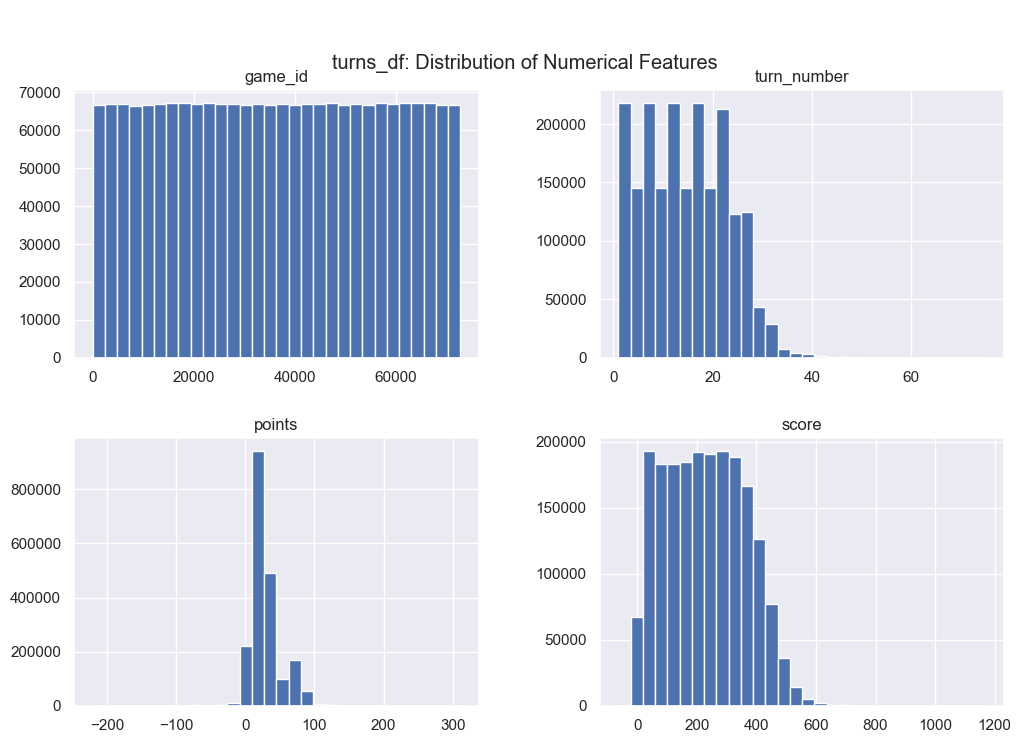


Value counts for nickname:
 nickname
BetterBot       360931
STEEBot         333276
HastyBot        309554
BB-8             92896
hannahbanana     26299
pandorable       26075
marvin           15558
Eloquent         14451
Goldenlamb       13304
hulkbuster       11320
Name: count, dtype: int64

Value counts for rack:
 rack
I    2900
U    1883
E    1780
R    1772
N    1655
T    1489
A    1461
L    1330
O    1240
Q     859
Name: count, dtype: int64

Value counts for location:
 location
15A    24190
H1     23894
8D     23499
O1     23377
8G     22077
8A     15941
8H     13729
1A     12988
A1     12352
12A    12004
Name: count, dtype: int64

Value counts for move:
 move
--        14302
QI        14221
Q.        10318
-          8065
.I         5167
OI         4635
XI         4419
(time)     4143
OX         3659
EX         3410
Name: count, dtype: int64

Value counts for turn_type:
 turn_type
Play             1872864
End                67987
Exchange           48997
Pass                8065


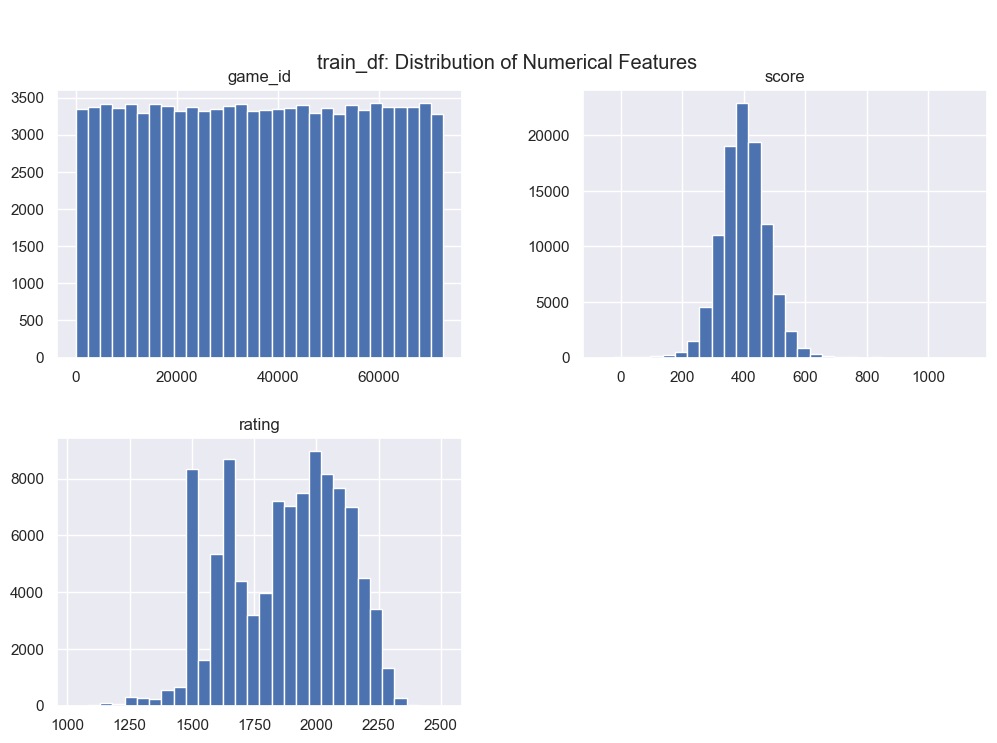


Value counts for nickname:
 nickname
HastyBot      17346
BetterBot     16602
STEEBot       16462
BB-8           6576
pandorable     1759
Goldenlamb     1029
HivinD          592
kar2008         576
Rexington       561
Anita           555
Name: count, dtype: int64


In [59]:
# Histograms of numerical features for games_df
games_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("games_df: Distribution of Numerical Features")
plt.show()

# Value counts for categorical features for games_df
for col in games_df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", games_df[col].value_counts().head(10))


# Histograms of numerical features for turns_df
turns_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("\n\nturns_df: Distribution of Numerical Features")
plt.show()

# Value counts for categorical features for turns_df
for col in turns_df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", turns_df[col].value_counts().head(10))


# Histograms of numerical features for train_df
train_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("\n\ntrain_df: Distribution of Numerical Features")
plt.show()

# Value counts for categorical features for train_df
for col in train_df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", train_df[col].value_counts().head(10))

# Step 4: Feature Relationships

Score & Rating Correlation:
           score    rating
score   1.000000  0.334759
rating  0.334759  1.000000


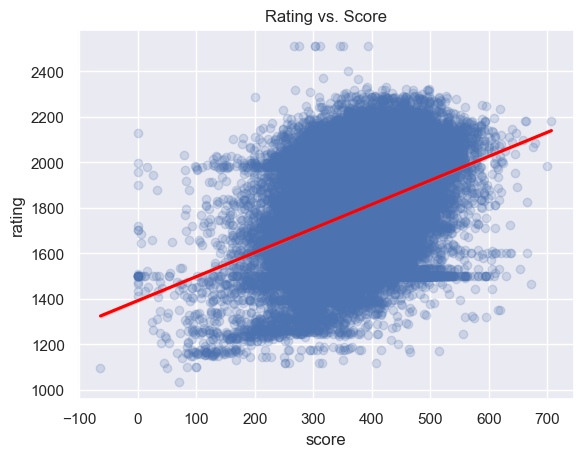

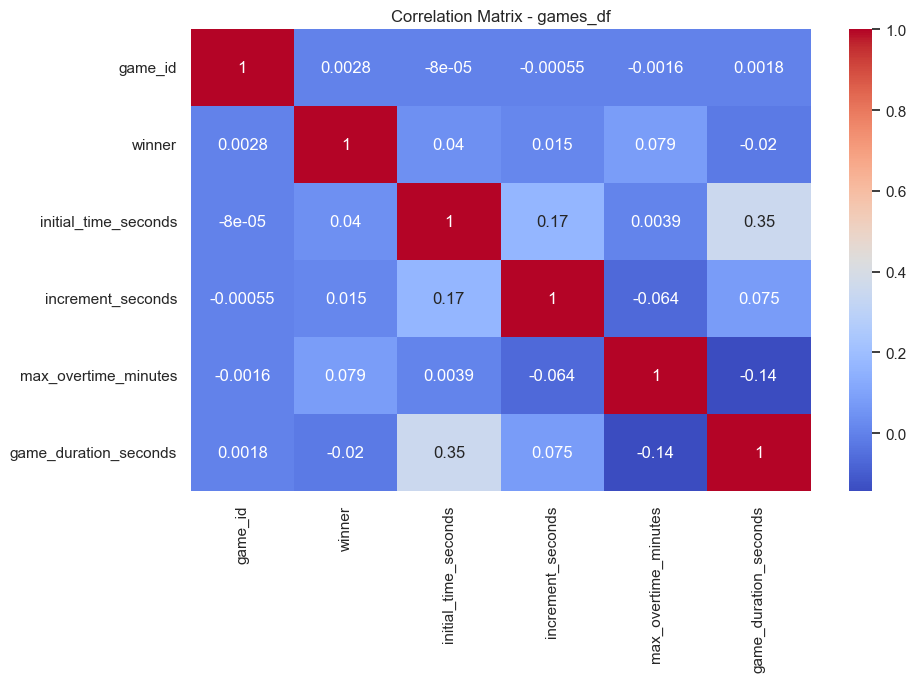

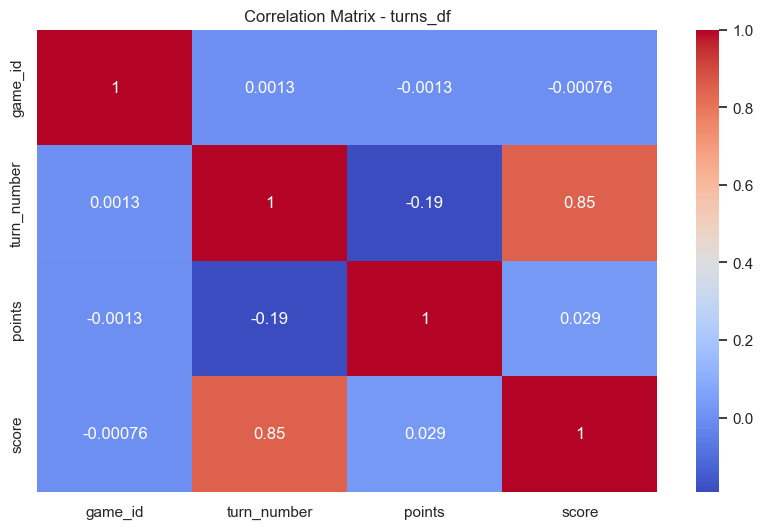

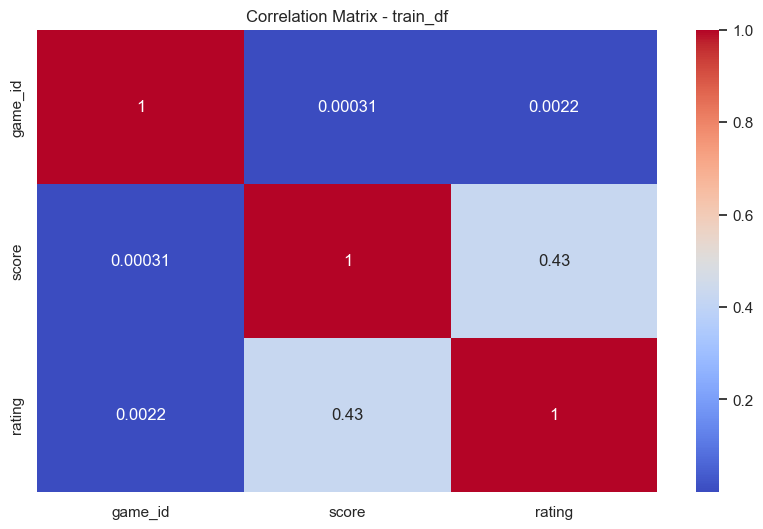

In [81]:
#=== Rating vs. Score graph === 

print(f"Score & Rating Correlation:\n{train_df_without_bots[['score', 'rating']].corr()}")

# Define the nicknames to exclude
exclude_nicknames = ['BetterBot', 'STEEBot', 'HastyBot']

# Create a boolean mask
mask = train_df['nickname'].isin(exclude_nicknames)

# Use ~mask to get only the rows NOT in the list
train_df_without_bots = train_df[~mask]

sns.regplot(data=train_df_without_bots, x='score', y='rating', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Rating vs. Score')
plt.show()



# Heatmap Correlation for games_df
numeric_cols = games_df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - games_df")
plt.show()


# Heatmap Correlation for turns_df
numeric_cols = turns_df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - turns_df")
plt.show()

# Heatmap Correlation for train_df
numeric_cols = train_df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - train_df")
plt.show()